## Imports

In [1]:
import torch
import shutil
import random
import glob

import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image

from torch import optim
from torch import nn

import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torchvision.datasets import ImageFolder
from torchvision.datasets import ImageNet
from torchvision import transforms
from torchvision import models

#import torchvision.models as models
#from torchvision.transforms import Compose
#from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## Data sorting

In [2]:
f1  = open("class_string.txt", "r").read().split("\n")
f2  = open("fname_string.txt", "r").read().split("\n")

class Resize(object):
    def __init__(self, size, interpolation=Image.BILINEAR):
        self.size = size
        self.interpolation = interpolation
        self.ratio = []

    def __call__(self, img):
        old_size = img.size  # old_size[0] is in (width, height) format

        ratio = float(self.size)/max(old_size)
        self.ratio.append(ratio)
        new_size = tuple([int(x * ratio) for x in old_size])
        
        img=img.resize(new_size, resample=self.interpolation)
        new_im = Image.new("RGB", (self.size, self.size))
        new_im.paste(img, ((self.size-new_size[0])//2,(self.size-new_size[1])//2))
        return new_im

#resize = Resize(224)
#img = resize(Image.open('train_all_test/00003.jpg'))
#img.save('train_all_test/00003.jpg') 

In [ ]:
resize = Resize(224)
for fname in f2:
    img = resize(Image.open('train_all/{}'.format(fname)))
    img.save('train_all/{}'.format(fname)) 
ratio = resize.ratio

with open('aspectratio.txt', 'w') as f:
    for item in ratio:
        f.write("%s\n" % item)

In [2]:
f4  = open("aspectratio.txt", "r").read().split("\n")
ratio=[]
for line in f4:
    try:
        ratio.append(float(line))
    except:
        pass

In [2]:
f1  = open("class_string.txt", "r").read().split("\n")
f2  = open("fname_string.txt", "r").read().split("\n")
f3 = open("bbox.txt", "r").read().split("\n")
totbbox = []
for ind, line in enumerate(f3):
    f1[ind] = int(f1[ind])
    bbox = line.split("\t") # x1,y1,x2,y2
    bbox[0] = float(bbox[0])
    bbox[1] = float(bbox[1])
    bbox[2] = float(bbox[2])
    bbox[3] = float(bbox[3])
    #bbox[0] = float(bbox[0]*ratio[ind])
    #bbox[1] = float(bbox[1]*ratio[ind])
    #bbox[2] = float(bbox[2]*ratio[ind])
    #bbox[3] = float(bbox[3]*ratio[ind])
    totbbox.append(bbox)
#totbbox = torch.tensor(totbbox,dtype=torch.float32)
fin_list = []
for i in range(len(f2)):
    fin_list.append([f2[i],f1[i],totbbox[i][0],totbbox[i][1],totbbox[i][2],totbbox[i][3]])
print(fin_list[0][:])
df = pd.DataFrame(fin_list, columns=['image_id','labels', 'x0','y0','x1','y1'])

f1_set = set(f1)
print(f1_set.union(f1_set))

['00001.jpg', 14, 39.0, 116.0, 569.0, 375.0]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196}


In [4]:
train_all_path = Path.cwd() / "train_all"

all_filenames = list(train_all_path.glob("*.jpg"))
all_filenames_length = len(all_filenames)
#print(all_filenames)

train_filenames = random.sample(all_filenames, int(0.8*all_filenames_length))
#print(train_filenames)
val_filenames=[]
for file in all_filenames:
    if file not in train_filenames:
        val_filenames.append(file)
        
        
for subdirectory in range(1,197):
    subdirectory = Path("train/{}".format(subdirectory))
    subdirectory.mkdir(parents=True, exist_ok=True)
for subdirectory in range(1,197):
    subdirectory = Path("val/{}".format(subdirectory))
    subdirectory.mkdir(parents=True, exist_ok=True)
    

     
for index in range(all_filenames_length):
    rand = np.random.rand()
    if rand < 0.8:
        shutil.copyfile(all_filenames[index], Path.cwd() / "train/{}/{}".format(f1[index],f2[index]))
    else:
        shutil.copyfile(all_filenames[index], Path.cwd() / "val/{}/{}".format(f1[index],f2[index]))
    

## Data Handler


In [5]:
def compare_transforms(transformations, index):
    """Visually compare transformations side by side.
    Takes a list of ImageFolder datasets with different compositions of transformations.
    It then display the `index`th image of the dataset for each transformed dataset in the list.
    
    Example usage:
        compare_transforms([dataset_with_transform_1, dataset_with_transform_2], 0)
    
    Args:
        transformations (list(ImageFolder)): list of ImageFolder instances with different transformations
        index (int): Index of the sample in the ImageFolder you wish to compare.
    """
    
    # Here we combine two neat functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, like a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
    if not all(isinstance(transf, ImageFolder) for transf in transformations):
        raise TypeError("All elements in the `transformations` list need to be of type ImageFolder")
        
    num_transformations = len(transformations)
    fig, axes = plt.subplots(1, num_transformations)
    
    # This is just a hack to make sure that `axes` is a list of the same length as `transformations`.
    # If we only have one element in the list, `plt.subplots` will not create a list of a single axis
    # but rather just an axis without a list.
    if num_transformations == 1:
        axes = [axes]
        
    for counter, (axis, transf) in enumerate(zip(axes, transformations)):
        axis.set_title("transf: {}".format(counter))
        image_tensor = transf[index][0]
        display_image(axis, image_tensor)

    plt.show()

def display_image(axis, image_tensor):
    """Display a tensor as image
    
    Example usage:
        _, axis = plt.subplots()
        some_random_index = 453
        image_tensor, _ = train_dataset[some_random_index]
        display_image(axis, image_tensor)
    
    Args:
        axis (pyplot axis)
        image_tensor (torch.Tensor): tensor with shape (num_channels=3, width, heigth)
    """
    
    # See hint above
    if not isinstance(image_tensor, torch.Tensor):
        raise TypeError("The `display_image` function expects a `torch.Tensor` " +
                        "use the `ToTensor` transformation to convert the images to tensors.")
        
    # The imshow commands expects a `numpy array` with shape (3, width, height)
    # We rearrange the dimensions with `permute` and then convert it to `numpy`
    image_data = image_tensor.permute(1, 2, 0).numpy()
    height, width, _ = image_data.shape
    axis.imshow(image_data)
    axis.set_xlim(0, width)
    # By convention when working with images, the origin is at the top left corner.
    # Therefore, we switch the order of the y limits.
    axis.set_ylim(height, 0)

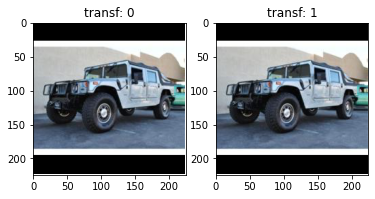

In [6]:
train_path = Path.cwd() / "train"
val_path = Path.cwd() / "val"

transform = transforms.Compose([transforms.ToTensor()])
transform1 = transforms.Compose([transforms.ToTensor()])
train_folder = ImageFolder(train_path, transform=transform)
train_folder1 = ImageFolder(train_path, transform=transform1)
val_folder = ImageFolder(val_path, transform=transform)

train_loaded = DataLoader(train_folder, batch_size=32, shuffle = True)
val_loaded = DataLoader(val_folder, batch_size=32)
compare_transforms([train_folder, train_folder1], 0)

In [3]:


class CarDataset(Dataset):
    def __init__(self, df, image_dir, transforms= None):
        super().__init__()
        
        self.df = df
        self.image_ids = self.df['image_id']
        self.image_dir = image_dir
        self.labels = self.df['labels']
        
    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        records = self.df[self.df["image_id"]==image_id]
        
        img = Image.open(self.image_dir/image_id)
        img = transforms.ToTensor()(img)
        
        boxes = records[["x0","y0", "x1", "y1"]].values
        #area = (boxes[0][2]-boxes[0][0])*(boxes[0][3]-boxes[0][1])
        boxes = torch.tensor(boxes)
        boxes = boxes.type(torch.FloatTensor)
        labels = records["labels"].values
        labels = torch.tensor(labels)
        labels = labels.type(torch.int64)
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        #target["image_id"] = torch.tensor([idx])
        #target["area"] = torch.tensor([area])
        #target["iscrowd"] = torch.zeros((197,), dtype=torch.int64)
        
        return img, target
                            
                                  
                                  
    def __len__(self):
        return self.image_ids.shape[0]
    
    
    
def my_collate(batch):
    #data = torch.tensor()
    #for i, item in enumerate(batch):
        #data[i,:] = item[0]
    data = [item[0] for item in batch]
    target = [item[1] for item in batch]
    #data = torch.tensor(data)
    return data, target
    
    
        
dataset = CarDataset(df, Path.cwd() / "cars_train_backup", f1) #"train_all"
        
datloaded = DataLoader(dataset, batch_size=2, collate_fn = my_collate)        

print(datloaded)


In [14]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = models.detection.fasterrcnn_resnet50_fpn(pretrained = True, pretrained_backbone = True)#, num_classes = 197)


classes = 197
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features,classes)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



tensor(1., device='cuda:0')
[{'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}]


In [5]:
model.train()

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.0005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
num_epochs = 12
for epoch in range(num_epochs):
    for b_x, b_y in datloaded:
        b_x = [item.to(device) for item in b_x]
        b_y = [{key: values.to(device) for key, values in target.items()} for target in b_y]
        loss_dict=model(b_x,b_y)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
    lr_scheduler.step()
    print(losses)
    print(epoch)

tensor(6.0096, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.0103, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.0074, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9949, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9818, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.0042, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9424, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9342, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9778, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.8650, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.8497, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.8713, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7882, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7677, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7587, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.6577, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.6148, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.4574, device='cuda:0', grad_fn=<AddBack

tensor(0.3026, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2840, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2973, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3125, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2936, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2417, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2660, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1795, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2252, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2253, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2027, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1896, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2431, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1826, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3298, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2409, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2529, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2088, device='cuda:0', grad_fn=<AddBack

tensor(0.2555, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2040, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2397, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3847, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2479, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2939, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3127, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3073, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2557, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3001, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2791, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2591, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2953, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2115, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2363, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2128, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2888, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1956, device='cuda:0', grad_fn=<AddBack

tensor(0.1875, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2535, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2127, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2793, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2966, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2916, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2874, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2333, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2234, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2674, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2496, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2867, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2937, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3095, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2092, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2694, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2819, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1699, device='cuda:0', grad_fn=<AddBack

tensor(0.2531, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3607, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2368, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3539, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3079, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3412, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2654, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3502, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3477, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2699, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2892, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2398, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2665, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2844, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2230, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1901, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2016, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2320, device='cuda:0', grad_fn=<AddBack

tensor(0.2770, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2360, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2811, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2266, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2046, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2477, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1963, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2308, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1625, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1530, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1951, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1486, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1393, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2011, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1655, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1840, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2060, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1869, device='cuda:0', grad_fn=<AddBack

tensor(0.2144, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2156, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2063, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2281, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2915, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2884, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2372, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1988, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2287, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1818, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1512, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1971, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1815, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2822, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2309, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1897, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2774, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2863, device='cuda:0', grad_fn=<AddBack

tensor(0.2609, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2197, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2277, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2290, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2606, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2572, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2052, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1953, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2459, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1740, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1993, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1573, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1671, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2031, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2067, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1968, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2040, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2179, device='cuda:0', grad_fn=<AddBack

tensor(0.2946, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3065, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2512, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2986, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2474, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3380, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2218, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2399, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2139, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1658, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2464, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2330, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2384, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2618, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1912, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2080, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2778, device='cuda:0', grad_fn=<AddBack

tensor(0.2676, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2762, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2268, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1911, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1922, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2419, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2182, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2397, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2525, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2053, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2618, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1903, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1930, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2327, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2391, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1569, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2241, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3616, device='cuda:0', grad_fn=<AddBack

tensor(0.2126, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2180, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1934, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2832, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2511, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3086, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2328, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2779, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2087, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2581, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2275, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2542, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2791, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1773, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2241, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2272, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2805, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2670, device='cuda:0', grad_fn=<AddBack

tensor(0.2439, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3123, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2207, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2152, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1820, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2081, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2363, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2791, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2198, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2880, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1778, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2281, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2236, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2047, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1793, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2117, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1899, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2484, device='cuda:0', grad_fn=<AddBack

tensor(0.2126, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2970, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2614, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2183, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3007, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2300, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1761, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1888, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1954, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1700, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1672, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2202, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2170, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2372, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1872, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2422, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2735, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2223, device='cuda:0', grad_fn=<AddBack

tensor(0.1892, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2411, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2706, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2327, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2384, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1468, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2559, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1776, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1659, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1547, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1738, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2226, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2393, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3532, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2216, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1344, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1834, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1383, device='cuda:0', grad_fn=<AddBack

tensor(0.2405, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2314, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2355, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2333, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2097, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2333, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3152, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1677, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2285, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1896, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2094, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2270, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2180, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1544, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1741, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2381, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2655, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1030, device='cuda:0', grad_fn=<AddBack

tensor(0.2394, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2131, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2923, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2192, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2084, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2270, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2434, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2368, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2531, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1356, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2300, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3251, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2703, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2466, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2404, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2962, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2037, device='cuda:0', grad_fn=<AddBack

tensor(0.2554, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3751, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2100, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3271, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2610, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2697, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2798, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2479, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2746, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2416, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2893, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3070, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2675, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2726, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2646, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2664, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2767, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2355, device='cuda:0', grad_fn=<AddBack

tensor(0.2195, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2205, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2512, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2001, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1788, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2046, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1923, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1959, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2786, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1977, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2136, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2596, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2173, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1853, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2351, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2080, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1975, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1850, device='cuda:0', grad_fn=<AddBack

tensor(0.2386, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2732, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2882, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2353, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2237, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2087, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2148, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2588, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2065, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2718, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2257, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2409, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2628, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2477, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2319, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2175, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2768, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2158, device='cuda:0', grad_fn=<AddBack

tensor(0.2482, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1627, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2124, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1659, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1916, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.8766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2144, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1803, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2086, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1700, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1341, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2314, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2068, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2698, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1631, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1852, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2752, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2409, device='cuda:0', grad_fn=<AddBack

tensor(0.2784, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1113, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2112, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1758, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1814, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2609, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1718, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2285, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2226, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2303, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1829, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1951, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1531, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1984, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1757, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2029, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1576, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1693, device='cuda:0', grad_fn=<AddBack

tensor(0.2515, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2514, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2708, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2146, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2013, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2730, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2421, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2177, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2301, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2279, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2641, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2023, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2095, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2441, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2546, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2547, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2358, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1854, device='cuda:0', grad_fn=<AddBack

tensor(0.1680, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1973, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1808, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1858, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1622, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2198, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1998, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2556, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1731, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1507, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2191, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2321, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2154, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2115, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1806, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1513, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2032, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1831, device='cuda:0', grad_fn=<AddBack

tensor(0.1542, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1863, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1518, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1915, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1722, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2635, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2473, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1629, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2206, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2686, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2267, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2697, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1838, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2777, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1960, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1587, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1434, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3523, device='cuda:0', grad_fn=<AddBack

tensor(0.2438, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2914, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1959, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2346, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1786, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2196, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2407, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2627, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1847, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2133, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2552, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2015, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1890, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1842, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1301, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2272, device='cuda:0', grad_fn=<AddBack

tensor(0.1881, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2327, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2198, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2224, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2167, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2354, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1680, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1925, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2566, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2065, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2122, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2232, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1487, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1758, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1698, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2090, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.3554, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2008, device='cuda:0', grad_fn=<AddBack

tensor(0.2653, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2078, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2334, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2028, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2063, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1824, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1669, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1854, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1908, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1732, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2167, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2304, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2141, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2276, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1817, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1641, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2424, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1856, device='cuda:0', grad_fn=<AddBack

tensor(0.2076, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2208, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1582, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2112, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1348, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1350, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1940, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1753, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2340, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1972, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1934, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2462, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1807, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2572, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1957, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.2224, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.1695, device='cuda:0', grad_fn=<AddBack

In [8]:
#img = Image.open(Path.cwd() / "train_all"/"00001.jpg")
#img = [transforms.ToTensor()(img).to(device)]
im1 = Image.open("train_all/00001.jpg")
im1 = transforms.ToTensor()(im1)
im2 = Image.open("train_all/00002.jpg")
im2 = transforms.ToTensor()(im2)
images = torch.stack([im1]+[im2]).to(device)
print(torch.max(images[0]))

model = model.eval()
with torch.no_grad():
    out=model(images)
    print(out)


tensor(1., device='cuda:0')
[{'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}]


In [7]:

model.eval()
x = [torch.rand(3, 300, 400).to(device), torch.rand(3, 500, 400).to(device)]
predictions = model(x)
fin = torch.argmax(predictions[0]["boxes"])
print(predictions)

RuntimeError: CUDA out of memory. Tried to allocate 34.00 MiB (GPU 0; 8.00 GiB total capacity; 6.56 GiB already allocated; 8.75 MiB free; 60.91 MiB cached)

## Setting up architecture


In [8]:
vgg16 = models.vgg16(pretrained=True)
model = models.detection.fasterrcnn_resnet50_fpn(pretrained = True)


features=list(vgg16.features.children())[:-1]
feature_extractor=nn.Sequential(*features)

print(feature_extractor)
for b_x, b_y in train_loaded:
    a=feature_extractor(b_x)
    break
print(a.shape)



class ClassifierLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.fullyConnected1 = nn.Linear(vgg16.classifier[0].in_features, 4096)
        self.fullyConnected2 = nn.Linear(4096, 196)

    def forward(self, x):
        #x = x.view(-1, vgg16.classifier[0].in_features)
        x = F.relu(self.fullyConnected1(x))
        x = self.fullyConnected2(x)
        return F.log_softmax(x, dim=1)
    
vgg16.classifier=ClassifierLayer()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\David/.cache\torch\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|███████████████████████████████████████████████████████████████████████████████| 160M/160M [00:55<00:00, 3.01MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 224 and 768 in dimension 2 at C:\w\1\s\tmp_conda_3.7_055457\conda\conda-bld\pytorch_1565416617654\work\aten\src\TH/generic/THTensor.cpp:689

## Training


In [6]:
f3 = open("bbox.txt", "r").read().split("\n")
totbbox = []
for line in f3:
    bbox = line.split("\t") # x1,y1,x2,y2
    bbox[0] = int(bbox[0])
    bbox[1] = int(bbox[1])
    bbox[2] = int(bbox[2])
    bbox[3] = int(bbox[3])
    totbbox.append(bbox)
totbbox = torch.tensor(totbbox,dtype=torch.float32)

In [10]:
print(totbbox)
print(totbbox[1,:])

tensor([[  39.,  116.,  569.,  375.],
        [  36.,  116.,  868.,  587.],
        [  85.,  109.,  601.,  381.],
        ...,
        [  26.,  246.,  660.,  449.],
        [  78.,  526., 1489.,  908.],
        [  20.,  240.,  862.,  677.]])
tensor([ 36., 116., 868., 587.])
